In [25]:
%load_ext autoreload 
%autoreload 2

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt

import model as md
import view as vw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
duration = 100e-6
F_main_real=444e3
fs = F_main_real*20

F_noise_1=100e3
F_noise_2=700e3
F_noise_3=200e3
F_noise_4=2e6

phase_real=55

t = np.linspace(0, duration, int(duration * fs))  

U = md.generate_sin(t,F_main_real,2)+md.generate_sin(t,F_noise_1)+md.generate_sin(t,F_noise_2)+md.generate_sin(t,F_noise_3)+md.generate_sin(t,F_noise_4,1,phase_real)
I=md.generate_sin(t,F_main_real,2,phase_real)+md.generate_sin(t,F_noise_1)+md.generate_sin(t,F_noise_2)+md.generate_sin(t,F_noise_3)+md.generate_sin(t,F_noise_4,1,phase_real)

U = md.generate_sin(t,F_main_real,2)
I=md.generate_sin(t,F_main_real,2,phase_real)

phase_real_graph= np.full(len(t), phase_real)

444009.2298180534


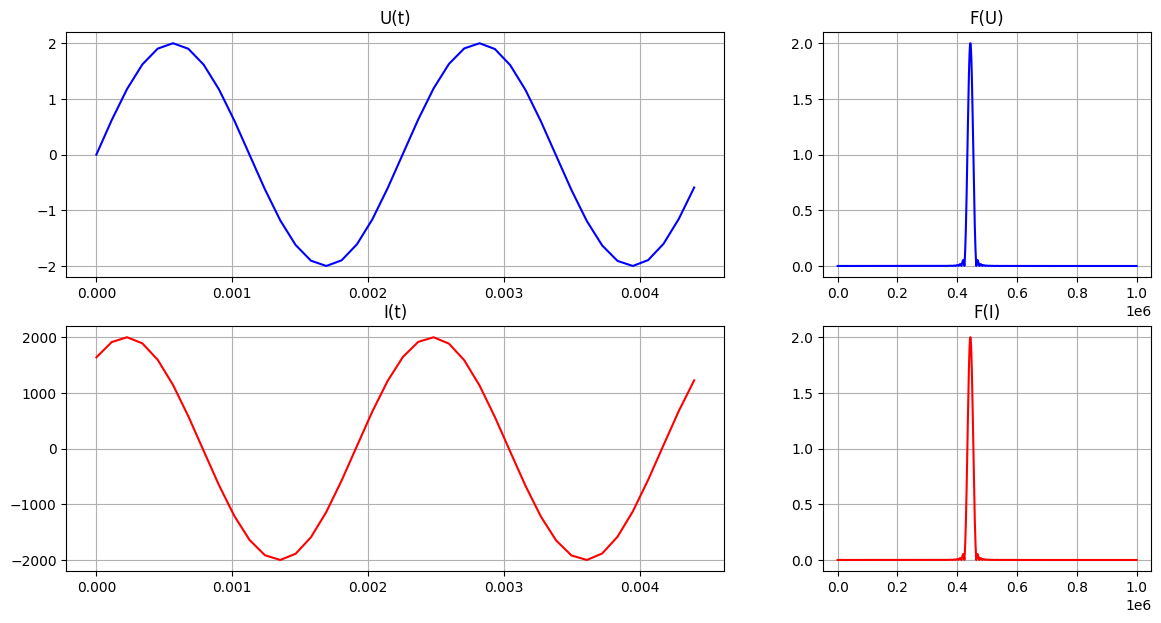

In [27]:
F,V = md.get_spectrum3(t,U)

F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc

print(F_peak_calc)

T_counts=md.convert_to_counts(t,T)

window=T_counts*2

vw.show_I_U_2(t,I,U,0,window)

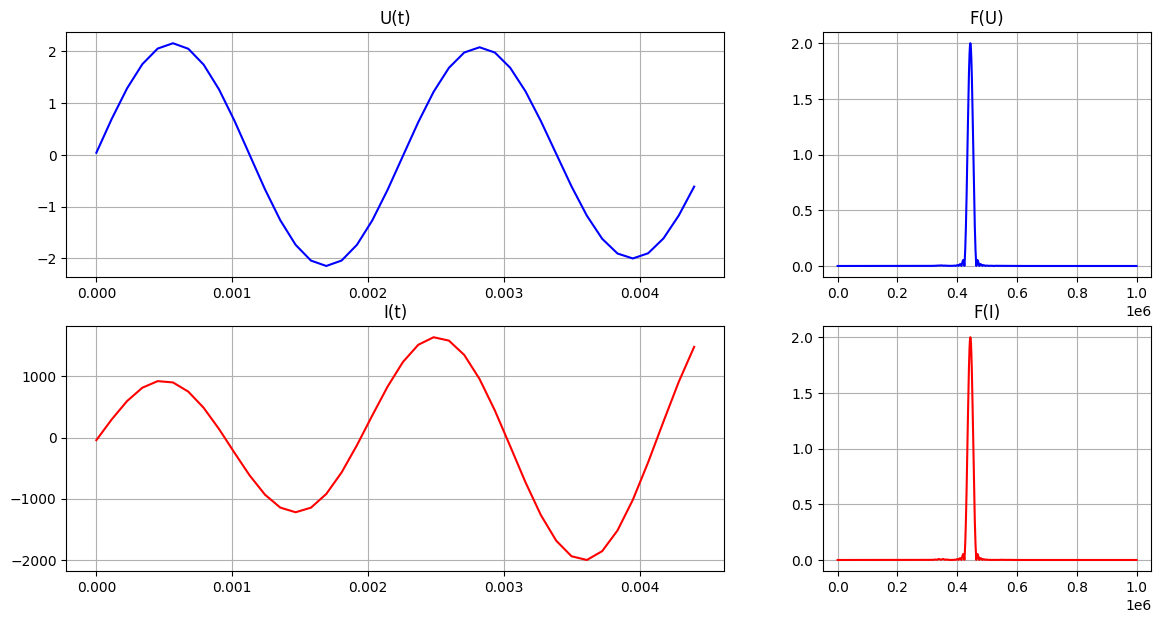

In [28]:
t_f, U_f=md.filter_butter_bandpass(t,U,F_peak_calc,100e3,5)
t_f, I_f=md.filter_butter_bandpass(t,I,F_peak_calc,100e3,5)

vw.show_I_U_2(t_f,I_f, U_f,0,window)

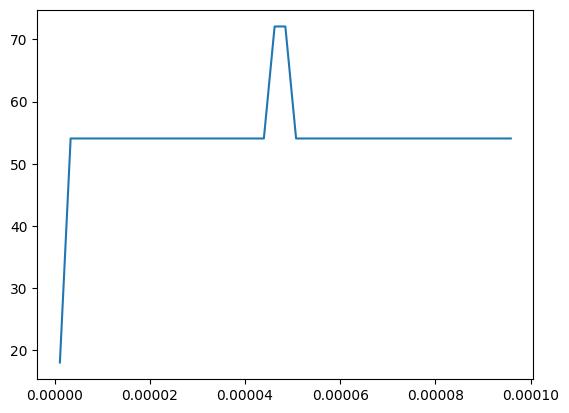

In [29]:
time_maxpoint,phase_maxpoint=md.get_phase_maxpoint_diff(t_f,U_f,I_f,F_peak_calc)
plt.plot(time_maxpoint,phase_maxpoint)

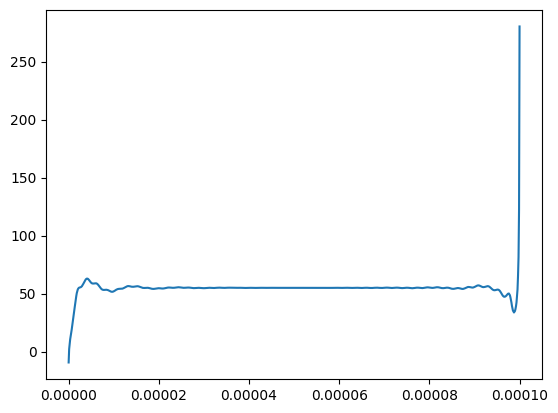

In [30]:
time_hilbert, phase_hilbert=md.get_phase_hilbert(t_f,U_f, I_f)
vw.plot(time_hilbert,phase_hilbert)

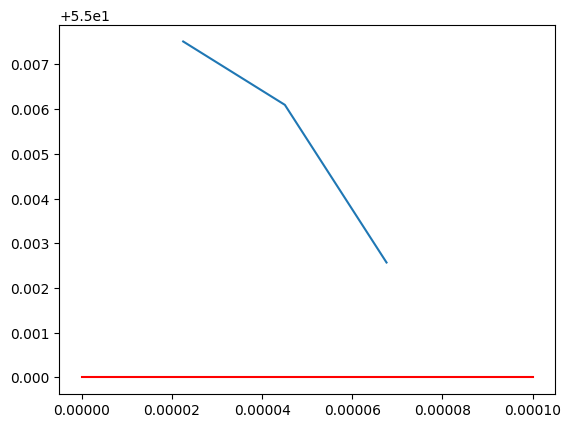

In [31]:
time_FFT, phase_FFT = md.get_phase_FFT(t_f,U_f, I_f, F_peak_calc, n_periods=20, overlap=0.5)
plt.plot(time_FFT, phase_FFT)
plt.plot(t,phase_real_graph,"red")

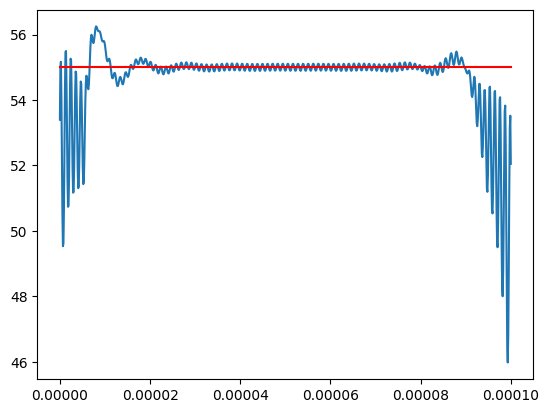

In [32]:
time_lockin, phase_lockin = md.get_phase_lockin(t_f,U_f, I_f,F_peak_calc,5)
plt.plot(time_lockin,phase_lockin)
plt.plot(t,phase_real_graph,"red")

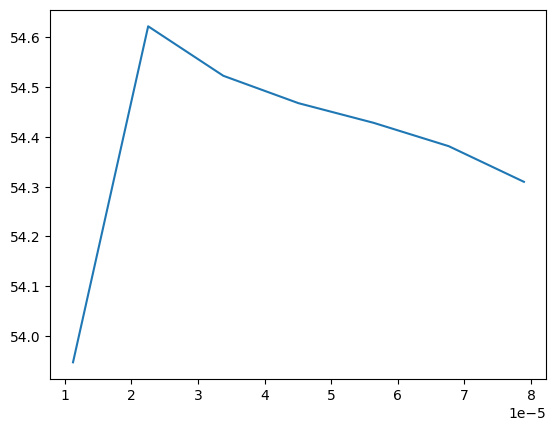

In [33]:
time_xcorr,phasse_xcorr = md.get_phase_xcorr2(t_f,U_f, I_f, F_peak_calc)
plt.plot(time_xcorr,phasse_xcorr)

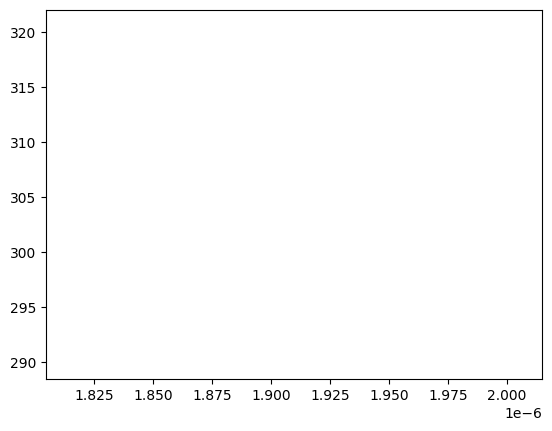

In [34]:
time_ZC, phase_ZC=md.phase_diff_zero_cross(t_f,U_f, I_f, F_peak_calc)
plt.plot(time_ZC, phase_ZC)

In [35]:
md.print_full_stats(F_peak_calc, phase_maxpoint,phase_hilbert,phase_FFT,phase_lockin,phasse_xcorr)

Array 1: Mean phase = 54.0620, KDE mode phase = 54.0620
Array 1: Mean Frel = 321857.7692, KDE mode Frel = 321857.7692
Array 2: Mean phase = 54.5357, KDE mode phase = 55.0280
Array 2: Mean Frel = 316290.9222, KDE mode Frel = 310575.2941
Array 3: Mean phase = 55.0054, KDE mode phase = 55.0064
Array 3: Mean Frel = 310836.0423, KDE mode Frel = 310824.4159
Array 4: Mean phase = 54.6715, KDE mode phase = 55.0024
Array 4: Mean Frel = 314707.1635, KDE mode Frel = 310870.9236
Array 5: Mean phase = 54.3824, KDE mode phase = 54.4481
Array 5: Mean Frel = 318085.7989, KDE mode Frel = 317315.9718
